# Part 3: Unbiased Evaluation using a New Test Set

In this part, we are take a new test set. We can now take advantage of the entire smart sample that we created in Part I. 

## Import modules as needed

In [1]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator 
import matplotlib.pyplot as plt


## Load smart sample and the best pipeline from Part II

In [2]:
import joblib 

model = joblib.load('model_2.pkl')

hitesh_df = joblib.load('undersample_df.pkl')



##  Retraining a pipeline using the full sampled training data set

We will use these full sampled training data set to train the pipeline.

In [3]:
# Add code below this comment  (Question #E301)
# ----------------------------------

envelope = EllipticEnvelope(support_fraction=1, contamination=0.08)  
envelope.fit(hitesh_df)

# Predict outliers
outliers = envelope.predict(hitesh_df) == -1  
hitesh_df = hitesh_df[~outliers]


# Scaling the data 

scale = Pipeline([
    ("scaler", MinMaxScaler())
])
hitesh_df = scale.fit_transform(hitesh_df)


In [4]:

X = hitesh_df[:, :-1]
y = hitesh_df[:, -1]


best_model = model.fit(X, y)
best_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('fa', FactorAnalysis(n_components=40)),
                ('rf', RandomForestClassifier(n_estimators=600))])

### Saving the trained model with the pickle library.

In [6]:
# Add code below this comment  
# -----------------------------


import joblib

joblib.dump(best_model,"model2.pkl")




['model2.pkl']


## Loading the Testing Data and evaluate your model

* We need to preprocess this test data

# Pre-Process

In [7]:
# Preprocess the given test set  (Question #E302)
# ----------------------------------


import os, sys
import numpy as np
import pandas as pd 

dataset = "/dsa/data/all_datasets/back_order/Kaggle_Test_Dataset_v2.csv"
assert os.path.exists(dataset)

dataset = pd.read_csv(dataset).sample(frac = 1).reset_index(drop=True)




/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
dataset.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3417267,14.0,2.0,0.0,19.0,38.0,76.0,7.0,23.0,43.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1,3452980,7.0,12.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,...,0.0,0.73,0.79,0.0,No,No,No,Yes,No,No
2,3340710,11.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.69,0.72,0.0,Yes,No,No,Yes,No,No
3,3453538,28.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.87,0.92,0.0,Yes,No,No,Yes,No,No
4,3396510,5.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.57,0.68,0.0,No,No,No,Yes,No,No


In [9]:
yes_no_columns = list(filter(lambda i: dataset[i].dtype!=np.float64, dataset.columns))
print(yes_no_columns)

# Add code below this comment  (Question #E102)
# ----------------------------------

print('potential_risk', dataset['potential_issue'].unique())
print('deck_risk', dataset['deck_risk'].unique())
print('oe_constraint', dataset['oe_constraint'].unique())
print('ppap_risk', dataset['ppap_risk'].unique())
print('stop_auto_buy', dataset['stop_auto_buy'].unique())
print('rev_stop', dataset['rev_stop'].unique())
print('went_on_backorder', dataset['went_on_backorder'].unique())
      

['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
potential_risk ['No' 'Yes' nan]
deck_risk ['No' 'Yes' nan]
oe_constraint ['No' 'Yes' nan]
ppap_risk ['No' 'Yes' nan]
stop_auto_buy ['Yes' 'No' nan]
rev_stop ['No' 'Yes' nan]
went_on_backorder ['No' 'Yes' nan]


In [10]:
for column_name in yes_no_columns:
    mode = dataset[column_name].apply(str).mode()[0]
    print('Filling missing values of {} with {}'.format(column_name, mode))
    dataset[column_name].fillna(mode, inplace=True)
    

Filling missing values of sku with (242075 rows)
Filling missing values of potential_issue with No
Filling missing values of deck_risk with No
Filling missing values of oe_constraint with No
Filling missing values of ppap_risk with No
Filling missing values of stop_auto_buy with Yes
Filling missing values of rev_stop with No
Filling missing values of went_on_backorder with No


In [11]:
print(dataset.isna().sum())

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          0
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64


In [12]:
dataset[yes_no_columns] = dataset[yes_no_columns].replace({'Yes': 1, 'No': 0})

In [13]:
dataset.drop('sku', axis=1, inplace=True) # Dropping the SKU column 

In [14]:
# Replacing NaN with mean 

dataset 

# calculate the mean value of column A
mean_A = dataset['lead_time'].mean()

# replace NaN values in column A with the mean value
dataset['lead_time'].fillna(mean_A, inplace=True)

# display the updated dataframe
print(dataset['lead_time'])

0          2.0
1         12.0
2          2.0
3          8.0
4         12.0
          ... 
242071     8.0
242072     8.0
242073     8.0
242074     2.0
242075     2.0
Name: lead_time, Length: 242076, dtype: float64


In [15]:

dataset[dataset["min_bank"].isna()]



,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
168856,NaN,7.923018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0


In [18]:
pp_data = dataset.drop(index = 168856)
pp_data = pp_data.reset_index(drop = True)


In [19]:
pp_data.isna().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

We can now predict and evaluate with the preprocessed test set. It would be interesting to see the performance with and without outliers removal from the test set. We can report confusion matrix, precision, recall, f1-score, accuracy, and other measures (if any). 

In [20]:
# scale = Pipeline([
#     ("scaler", MinMaxScaler())
# ])

# pp_data = scale.fit_transform(pp_data)
# pp_data_outlier = scale.fit_transform(pp_data)


# Prediction without Outliers

In [21]:
# Performing Anamoly detection


envelope = EllipticEnvelope(support_fraction=1, contamination=0.08)  
envelope.fit(pp_data)

# Predict outliers
outliers = envelope.predict(pp_data) == -1  

print(f"Number of outliers: {sum(outliers)}")

no_outliers = pp_data[~outliers]




Number of outliers: 19366


In [23]:
no_outliers.shape

(222709, 22)

In [35]:
scale = Pipeline([
    ("scaler", MinMaxScaler())
])
    
no_outliers = scale.fit_transform(no_outliers)


In [36]:
X_test = no_outliers[:, :-1]
y_test = no_outliers[:, -1]

In [37]:
# Add code below this comment  (Question #E303)
# ----------------------------------


y_pred1 = best_model.predict(X_test)
print(classification_report (y_test, y_pred1))


              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84    220150
         1.0       0.01      0.32      0.03      2559

    accuracy                           0.73    222709
   macro avg       0.50      0.53      0.43    222709
weighted avg       0.98      0.73      0.83    222709



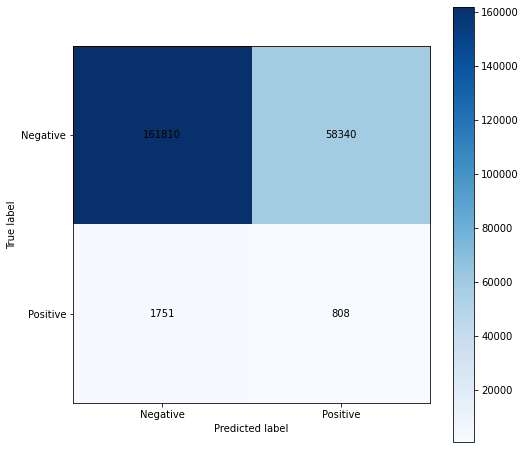

In [38]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred1)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 8))

# Plot confusion matrix as heatmap with labels
im = ax.imshow(conf_mat, cmap='Blues')

# Add colorbar and labels
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add values to heatmap
for i in range(len(conf_mat)):
    for j in range(len(conf_mat[0])):
        ax.text(j, i, conf_mat[i][j], ha='center', va='center', color='black')

plt.show()

# Prediction with outliers 

In [39]:
with_outlier = pp_data_outlier

In [40]:
with_outlier.shape

(242075, 22)

In [41]:
X_out = with_outlier[:, :-1]
y_out = with_outlier[:, -1]


In [42]:
y_pred2 = best_model.predict(X_out)
print(classification_report (y_out, y_pred2))


              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87    239387
         1.0       0.01      0.27      0.03      2688

    accuracy                           0.77    242075
   macro avg       0.50      0.52      0.45    242075
weighted avg       0.98      0.77      0.86    242075



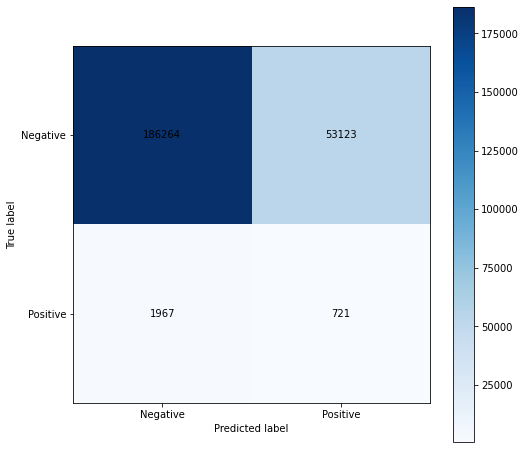

In [43]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_out, y_pred2)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 8))

# Plot confusion matrix as heatmap with labels
im = ax.imshow(conf_mat, cmap='Blues')

# Add colorbar and labels
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add values to heatmap
for i in range(len(conf_mat)):
    for j in range(len(conf_mat[0])):
        ax.text(j, i, conf_mat[i][j], ha='center', va='center', color='black')

plt.show()

## Conclusion

## Reflect

**Brief Summary** for "management" that details the findings, level of certainty and trust in the models, 
and recommendations for operationalizing these models for the business.